#  <span style="color:orange">Tutorial de classificação binária (CLF101) - Nível iniciante</span>

**Criado usando: PyCaret 2.3.10** <br />
**Data de atualização versão em inglês: 11 de novembro de 2020**<br />
**Data de atualização versão em português: 01 de junho de 2022**

- __[Link do repositório pycaret no github](https://github.com/pycaret/pycaret)__
- __[Link da versão em inglês no github](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__


# 1.0 Objetivo do tutorial
Bem-vindo ao Tutorial de Classificação Binária (CLF101) - Nível Iniciante. Este tutorial assume que você é novo no PyCaret e quer começar com Classificação Binária usando o módulo `pycaret.classification`.

Neste tutorial vamos aprender:


* **Obtendo dados:** como importar dados do repositório PyCaret
* **Configurando o ambiente:** como configurar um experimento no PyCaret e começar a criar modelos de classificação
* **Criar modelo:** como criar um modelo, realizar validação cruzada estratificada e avaliar métricas de classificação
* **Ajustar modelo:** como ajustar automaticamente os hiperparâmetros de um modelo de classificação
* **Plotagem do modelo:** como analisar o desempenho do modelo usando vários gráficos
* **Finalizar o modelo:** como finalizar o melhor modelo ao final do experimento
* **Predict usando o modelo:** como fazer previsões em dados novos/não vistos
* **Salvar/carregar modelo:** como salvar/carregar um modelo para uso futuro

Tempo de leitura: Aprox. 30 minutos


## 1.1 Instalando o PyCaret
O primeiro passo para começar a usar o PyCaret é instalar o pycaret. A instalação é fácil e levará apenas alguns minutos. Siga as instruções abaixo:

#### Instalando o PyCaret no Jupyter Notebook Local
`pip install pycaret` <br />

#### Instalando o PyCaret no Google Colab ou no Azure Notebooks
`!pip install pycaret`


## 1.2 Pré-requisitos
- Python 3.6 ou superior
- PyCaret 2.0 ou superior
- Conexão com a Internet para carregar dados do repositório do pycaret
- Conhecimentos Básicos de Classificação Binária

## 1.3 Para usuários do Google colab:
Se você estiver executando este notebook no Google colab, execute o código a seguir na parte superior do notebook para exibir recursos visuais interativos.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


## 1.4 Veja também:
- __[Tutorial de classificação binária (CLF102) - Nível intermediário - Inglês](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__
- __[Tutorial de classificação binária (CLF103) - Nível de especialista - Inglês](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__

# 2.0 O que é Classificação Binária?
A classificação binária é uma técnica de aprendizado de máquina supervisionada em que o objetivo é prever rótulos de classe categórica que são discretos e não ordenados, como Aprovado/Reprovado, Positivo/Negativo, Padrão/Não Padrão etc. Alguns casos de uso do mundo real para classificação estão listados abaixo :

- Exames médicos para determinar se um paciente tem uma determinada doença ou não - a propriedade de classificação é a presença da doença.
- Um método de teste "aprovado ou reprovado" ou controle de qualidade em fábricas, ou seja, decidindo se uma especificação foi ou não atendida - uma classificação de aprovação/reprovação.
- Recuperação de informação, nomeadamente decidir se uma página ou um artigo deve ou não estar no conjunto de resultados de uma pesquisa – a propriedade de classificação é a relevância do artigo, ou a utilidade para o utilizador.

__[Saiba mais sobre classificação binária](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)__

# 3.0 Visão geral do módulo de classificação no PyCaret
O módulo de classificação do PyCaret (`pycaret.classification`) é um módulo de aprendizado de máquina supervisionado que é usado para classificar os elementos em um grupo binário baseado em várias técnicas e algoritmos. Alguns casos de uso comuns de problemas de classificação incluem a previsão de inadimplência do cliente (sim ou não), rotatividade de clientes (o cliente sairá ou ficará), doença encontrada (positiva ou negativa).

O módulo de classificação PyCaret pode ser usado para problemas de classificação binária ou multiclasse. Possui mais de 18 algoritmos e 14 gráficos para analisar o desempenho dos modelos. Seja ajuste de hiperparâmetros, ensembling ou técnicas avançadas como empilhamento, o módulo de classificação do PyCaret tem tudo.

# 4.0 Conjunto de dados para o tutorial

Para este tutorial, usaremos um conjunto de dados da UCI chamado **Default of Credit Card Clients Dataset**. Este conjunto de dados contém informações sobre pagamentos padrão, fatores demográficos, dados de crédito, histórico de pagamentos e extratos de cobrança de clientes de cartão de crédito em Taiwan de abril de 2005 a setembro de 2005. Existem 24.000 amostras e 25 recursos. As descrições curtas de cada coluna são as seguintes:

- **ID:** ID de cada cliente
- **LIMIT_BAL:** Valor do crédito concedido em NEW TAIWAN dólares (inclui crédito individual e familiar/complementar)
- **SEX:** Gênero (1=masculino, 2=feminino)
- **EDUCATION:** (1=graduação, 2=universidade, 3=ensino médio, 4=outros, 5=desconhecido, 6=desconhecido)
- **MARRIAGE:** Estado civil (1=casado, 2=solteiro, 3=outros)
- **AGE:** Idade em anos
- **PAY_0 a PAY_6:** Status de pagamento há n meses (PAY_0 = último mês ... PAY_6 = 6 meses atrás) (Rótulos: -1=pagamento devido, 1=atraso no pagamento por um mês, 2=atraso no pagamento por dois meses, ... 8=atraso de pagamento por oito meses, 9=atraso de pagamento por nove meses e acima)
- **BILL_AMT1 a BILL_AMT6:** Valor do extrato da conta há n meses ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 meses atrás)
- **PAY_AMT1 a PAY_AMT6:** Valor do pagamento até n meses atrás ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 meses atrás)
- **DEFAULT:** default no pagamento (1=sim, 0=não) `Coluna target (resposta)`

#### Fonte do conjunto de dados:
Lichman, M. (2013). Repositório de aprendizado de máquina UCI. Irvine, CA: Universidade da Califórnia, Escola de Informação e Ciência da Computação.

O conjunto de dados original e o dicionário de dados podem ser __[encontrados aqui.](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__

# 5.0 Obtendo os dados

Você pode baixar os dados da fonte original __[encontrado aqui](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ e carregá-los usando pandas __[( Saiba como)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ ou você pode usar o repositório de dados do PyCaret para carregar os dados usando o `get_data()` função (Isso exigirá uma conexão com a Internet).

In [1]:
from pycaret.datasets import get_data
import pycaret

%reload_ext watermark
%watermark -iv -v

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.22.2

pycaret: 3.3.2



In [2]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#verifica a dimensão do dataframe
dataset.shape

(24000, 24)

Para demonstrar a função `predict_model()` em dados não vistos, uma amostra de 1.200 registros foi retida do conjunto de dados original para ser usada para previsões. Isso não deve ser confundido com uma divisão de treinamento/teste, pois essa divisão específica é realizada para simular um cenário da vida real. Outra maneira de pensar sobre isso é que esses 1.200 registros não estão disponíveis no momento em que o experimento de aprendizado de máquina foi realizado.

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (22800, 24)
Conjunto de dados não usados no treino/teste, apenas como validação: (1200, 24)


# 6.0 Configurando o ambiente no PyCaret

A função `setup()` inicializa o ambiente em pycaret e cria o pipeline de transformação para preparar os dados para modelagem e implantação. `setup()` deve ser chamado antes de executar qualquer outra função em pycaret. São necessários dois parâmetros obrigatórios: um dataframe de pandas e o nome da coluna de destino. Todos os outros parâmetros são opcionais e são usados para personalizar o pipeline de pré-processamento (veremos em tutoriais posteriores).

Quando `setup()` é executado, o algoritmo de inferência do PyCaret inferirá automaticamente os tipos de dados para todos os recursos com base em determinadas propriedades. O tipo de dados deve ser inferido corretamente, mas isso nem sempre é o caso. Para explicar isso, o PyCaret exibe uma tabela contendo os recursos e seus tipos de dados inferidos após a execução de `setup()`. Se todos os tipos de dados forem identificados corretamente, pode-se pressionar "enter" para continuar ou digitar "quit" para encerrar o experimento. Garantir que os tipos de dados estejam corretos é de fundamental importância no PyCaret, pois ele executa automaticamente algumas tarefas de pré-processamento que são imperativas para qualquer experimento de aprendizado de máquina. Essas tarefas são executadas de forma diferente para cada tipo de dados, o que significa que é muito importante que elas sejam configuradas corretamente.

Em tutoriais posteriores, aprenderemos como sobrescrever o tipo de dados inferido do PyCaret usando os parâmetros `numeric_features` e `categorical_features` em `setup()`.

In [5]:
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


Uma vez que a configuração tenha sido executada com sucesso, ele imprime a grade de informações que contém várias informações importantes. A maioria das informações está relacionada ao pipeline de pré-processamento que é construído quando o `setup()` é executado. A maioria desses recursos está fora do escopo deste tutorial, no entanto, algumas coisas importantes a serem observadas neste estágio incluem:

- **session_id :** Um número pseudo-aleatório distribuído como semente em todas as funções para posterior reprodutibilidade. Se nenhum `session_id` for passado, um número aleatório é gerado automaticamente e é distribuído para todas as funções. Neste experimento, o `session_id` é definido como `123` para reprodutibilidade posterior.<br/>
<br/>
- **Target Type:** Binário ou Multiclasse. O tipo de alvo é detectado e exibido automaticamente. Não há diferença em como o experimento é realizado para problemas Binários ou Multiclasse. Todas as funcionalidades são idênticas.<br/>
<br/>
- **Label Encoded :** Quando a variável Target é do tipo string (ou seja, 'Yes' ou 'No') em vez de 1 ou 0, ela codifica automaticamente o rótulo em 1 e 0 e exibe o mapeamento (0 : No, 1: Sim) para referência. Neste experimento, nenhuma codificação de rótulo é necessária, pois a variável de destino é do tipo numérico. <br/>
<br/>
- **Original Data:** Exibe a forma original do conjunto de dados. Neste experimento (22.800, 24) significa 22.800 amostras e 24 recursos, incluindo a coluna de destino. <br/>
<br/>
- **Missing values:** quando houver valores ausentes nos dados originais, isso será exibido como Verdadeiro. Para este experimento, não há valores ausentes no conjunto de dados.
<br/>
<br/>
- **Numeric features:** o número de features inferidos como numéricos. Nesse conjunto de dados, 14 dos 24 features são inferidos como numéricos. <br/>
<br/>
- **Categorical features:** o número de features inferidos como categóricos. Neste conjunto de dados, 9 dos 24 features são inferidos como categóricos. <br/>
<br/>
- **Transformed Train Set:** exibe a forma do conjunto de treinamento transformado. Observe que a forma original de (22800, 24) é transformada em (15959, 91) para o conjunto de treino transformado e o número de features aumentou de 24 para 91 devido à codificação categórica <br/>
<br/>
- **Transformed Test Set:** exibe a forma do conjunto de teste/hold-out transformado. Existem 6841 amostras no conjunto de teste/hold-out. Essa divisão é baseada no valor padrão de 70/30 que pode ser alterado usando o parâmetro `train_size` na configuração. <br/>

Observe como algumas tarefas que são indispensáveis para realizar a modelagem são tratadas automaticamente, como imputação de valores ausentes (neste caso, não há valores ausentes nos dados de treinamento, mas ainda precisamos de imputadores para dados não vistos), codificação categórica etc. parâmetros em `setup()` são opcionais e usados para personalizar o pipeline de pré-processamento. Esses parâmetros estão fora do escopo deste tutorial, mas à medida que você avança para os níveis intermediário e especialista, nós os abordaremos com muito mais detalhes.

# 7.0 Comparando todos os modelos

Comparar todos os modelos para avaliar o desempenho é o ponto de partida recomendado para a modelagem assim que a configuração estiver concluída (a menos que você saiba exatamente que tipo de modelo você precisa, o que geralmente não é o caso). Essa função treina todos os modelos na biblioteca de modelos e os pontua usando validação cruzada estratificada para avaliação de métricas. A saída imprime uma grade de pontuação que mostra a Precisão média, AUC, Recall, Precision, F1, Kappa e MCC (Matthews correlation coefficient) em folds (10 por padrão) junto com a quantidade de vezes de treinamento.

In [7]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8226,0.7882,0.3779,0.6780,0.4852,0.3883,0.4126,1.0380
lightgbm,Light Gradient Boosting Machine,0.8224,0.7849,0.3915,0.6679,0.4936,0.3947,0.4154,0.1320
ada,Ada Boost Classifier,0.8209,0.7796,0.3510,0.6863,0.4643,0.3699,0.4001,0.2600
rf,Random Forest Classifier,0.8192,0.7726,0.3864,0.6550,0.4860,0.3850,0.4048,0.6800
lda,Linear Discriminant Analysis,0.8145,0.7213,0.2725,0.7119,0.3938,0.3092,0.3593,0.0220
et,Extra Trees Classifier,0.8141,0.7655,0.3856,0.6308,0.4785,0.3734,0.3902,0.2880
lr,Logistic Regression,0.8069,0.7115,0.2377,0.6818,0.3520,0.2686,0.3206,0.8340
ridge,Ridge Classifier,0.8013,0.7213,0.1581,0.7387,0.2601,0.1976,0.2776,0.0180
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
knn,K Neighbors Classifier,0.7494,0.6069,0.1796,0.3647,0.2406,0.1109,0.1209,0.4860


Duas palavras simples de código ***(nem mesmo uma linha)*** treinaram e avaliaram mais de 15 modelos usando validação cruzada. A grade de pontuação impressa acima destaca a métrica de melhor desempenho apenas para fins de comparação. A grade por padrão é classificada usando Precisão ('Accuracy') (do maior para o menor) que pode ser alterado passando o parâmetro `sort`. Por exemplo, `compare_models(sort = 'Recall')` classificará a grade por Recall em vez de Accuracy. Se você quiser alterar o parâmetro fold do valor padrão de `10` para um valor diferente, então você pode usar o parâmetro `fold`. Por exemplo, `compare_models(fold = 5)` irá comparar todos os modelos na validação cruzada de 5 vezes. Reduzir o número de folds melhorará o tempo de treinamento. Por padrão, `compare_models` retorna o modelo com melhor desempenho com base na ordem de classificação padrão, mas pode ser usado para retornar uma lista dos N principais modelos usando o parâmetro `n_select`.

In [8]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# 8.0 Criando um modelo

`create_model` é a função mais granular no PyCaret e geralmente é a base por trás da maioria das funcionalidades do PyCaret. Como o nome sugere, esta função treina e avalia um modelo usando validação cruzada que pode ser definida com o parâmetro `fold`. A saída imprime uma grade de pontuação que mostra Precisão, AUC, Recall, Precisão, F1, Kappa e MCC por dobra.

Para a parte restante deste tutorial, trabalharemos com os modelos abaixo como nossos modelos candidatos. As seleções são apenas para fins ilustrativos e não significam necessariamente que são as de melhor desempenho ou ideais para esse tipo de dados.

- Classificador de Árvore de Decisão ('dt') - decision tree
- Classificador K Neighbors ('knn')
- Classificador de Floresta Aleatória ('rf') - random forest

Existem 18 classificadores disponíveis na biblioteca de modelos do PyCaret. Para ver a lista de todos os classificadores, verifique a `docstring` ou use a função `models` para ver a lista de modelos.

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 8.1 Decision Tree Classifier

In [10]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7356,0.6274,0.4334,0.4080,0.4203,0.2493,0.2495
1,0.7237,0.6158,0.4193,0.3854,0.4016,0.2224,0.2227
2,0.7444,0.6514,0.4816,0.4304,0.4545,0.2883,0.2891
3,0.7199,0.6094,0.4079,0.3770,0.3918,0.2103,0.2106
4,0.7419,0.6233,0.4108,0.4155,0.4131,0.2477,0.2477
5,0.7299,0.6248,0.4363,0.3990,0.4168,0.2415,0.2419
6,0.7174,0.6015,0.3938,0.3697,0.3813,0.1985,0.1986
7,0.7325,0.6213,0.4221,0.4005,0.4110,0.2381,0.2382
8,0.7268,0.6147,0.4136,0.3893,0.4011,0.2244,0.2245


In [11]:
#O modelo treinado é guardado na variável 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


### 8.2 K Neighbors Classifier

In [12]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7412,0.5886,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5767,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6671,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7469,0.5987,0.1530,0.3396,0.2109,0.0853,0.0949
4,0.7538,0.6085,0.1983,0.3889,0.2627,0.1332,0.1441
5,0.7613,0.6211,0.1870,0.4125,0.2573,0.1384,0.1539
6,0.7419,0.5895,0.1671,0.3333,0.2226,0.0879,0.0954
7,0.7594,0.6135,0.1898,0.4061,0.2587,0.1371,0.1513
8,0.7475,0.6091,0.1898,0.3641,0.2495,0.1155,0.1243


### 8.3 Random Forest Classifier

In [13]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7717,0.4108,0.6591,0.5061,0.4051,0.4219
1,0.8271,0.7726,0.4023,0.6860,0.5071,0.4108,0.4323
2,0.8233,0.8079,0.4108,0.6621,0.5070,0.4065,0.4237
3,0.8120,0.7501,0.3711,0.6268,0.4662,0.3611,0.3794
4,0.8139,0.7623,0.3541,0.6443,0.4570,0.3560,0.3793
5,0.8221,0.7827,0.3909,0.6667,0.4929,0.3937,0.4144
6,0.8120,0.7607,0.3711,0.6268,0.4662,0.3611,0.3794
7,0.8258,0.7959,0.4023,0.6794,0.5053,0.4079,0.4286
8,0.8208,0.7602,0.3739,0.6701,0.4800,0.3821,0.4058


Observe que a pontuação média de todos os modelos corresponde à pontuação impressa em `compare_models()`. Isso ocorre porque as métricas impressas na grade de pontuação `compare_models()` são as pontuações médias em todos os folds do CV (cross-validation). Semelhante a `compare_models()`, se você quiser alterar o parâmetro fold do valor padrão de 10 para um valor diferente, então você pode usar o parâmetro `fold`. Por exemplo: `create_model('dt', fold = 5)` criará um classificador de árvore de decisão usando CV estratificado de 5 vezes.

# 9.0 Model tunning (Hyperparameter Tunning)

Quando um modelo é criado usando a função `create_model()`, ele usa os hiperparâmetros padrão para treinar o modelo. Para ajustar os hiperparâmetros, a função `tune_model()` é usada. Esta função ajusta automaticamente os hiperparâmetros de um modelo usando `Random Grid Search` em um espaço de busca pré-definido. A saída imprime uma grade de pontuação que mostra Precisão, AUC, Recall, Precisão, F1, Kappa e MCC por dobra para o melhor modelo. Para usar a grade de pesquisa personalizada, você pode passar o parâmetro `custom_grid` na função `tune_model` (veja 9.2 Ajuste de KNN abaixo). <br/>
<br/>

### 9.1 Classificação usando Decision Tree

In [14]:
tuned_dt = tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:52:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8264,0.6573,0.3541,0.7184,0.4744,0.3845,0.4191
1,0.8271,0.6527,0.3399,0.7362,0.4651,0.3782,0.4185
2,0.8221,0.6515,0.3456,0.6971,0.4621,0.3697,0.4024
3,0.8170,0.6432,0.3314,0.6763,0.4449,0.3503,0.3823
4,0.8239,0.6486,0.3343,0.7195,0.4565,0.3678,0.4063
5,0.8252,0.6474,0.3286,0.7342,0.4540,0.3675,0.4097
6,0.8189,0.6434,0.3286,0.6905,0.4453,0.3530,0.3878
7,0.8283,0.6494,0.3286,0.7582,0.4585,0.3749,0.4213
8,0.8233,0.6503,0.3399,0.7101,0.4598,0.3695,0.4054


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
#modelo "tunado" está guardado na variável 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


### 9.2 Classificação usando K Neighbors

In [16]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:52:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7794,0.6342,0.0595,0.5122,0.1066,0.0635,0.1139
1,0.7826,0.6625,0.0453,0.6154,0.0844,0.0558,0.1222
2,0.7832,0.7012,0.0623,0.5946,0.1128,0.0740,0.1386
3,0.7801,0.6399,0.0510,0.5294,0.0930,0.0563,0.1096
4,0.7794,0.6403,0.0482,0.5152,0.0881,0.0522,0.1029
5,0.7820,0.6773,0.0595,0.5676,0.1077,0.0686,0.1286
6,0.7857,0.6403,0.0567,0.6897,0.1047,0.0736,0.1536
7,0.7788,0.6631,0.0623,0.5000,0.1108,0.0650,0.1131
8,0.7732,0.6275,0.0340,0.3636,0.0622,0.0253,0.0499


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


### 9.3 Classificação usando Random Forest

In [18]:
tuned_rf = tune_model(rf, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7813,0.7840,0.6091,0.5047,0.5520,0.4090,0.4122
1,0.7838,0.7872,0.6176,0.5093,0.5583,0.4169,0.4203
2,0.8001,0.8122,0.6516,0.5399,0.5905,0.4598,0.4634
3,0.7719,0.7664,0.5581,0.4864,0.5198,0.3712,0.3727
4,0.7914,0.7771,0.5751,0.5259,0.5494,0.4140,0.4147
5,0.7982,0.7891,0.6147,0.5385,0.5741,0.4426,0.4443
6,0.7713,0.7479,0.5694,0.4855,0.5241,0.3749,0.3769
7,0.7926,0.7820,0.6261,0.5262,0.5718,0.4363,0.4392
8,0.7769,0.7533,0.5807,0.4964,0.5352,0.3897,0.3918


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Por padrão, `tune_model` otimiza `Accuracy`, mas isso pode ser alterado usando o parâmetro `optimize`. Por exemplo: `tune_model(dt, optimize = 'AUC')` irá procurar os hiperparâmetros de um classificador de árvore de decisão que resulta no maior `AUC` em vez de `Accuracy`. Para os propósitos deste exemplo, usamos a métrica padrão "Precisão" apenas para simplificar. Geralmente, quando o conjunto de dados está desequilibrado (como o conjunto de dados de crédito com o qual estamos trabalhando), "Precisão" não é uma boa métrica a ser considerada. A metodologia por trás da seleção da métrica certa para avaliar um classificador está além do escopo deste tutorial, mas se você quiser saber mais sobre isso, você pode __[clique aqui](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__ para ler um artigo sobre como escolher a métrica de avaliação correta.

Métricas por si só não são os únicos critérios que você deve considerar ao finalizar o melhor modelo para produção. Outros fatores a serem considerados incluem tempo de treinamento, desvio padrão de kfolds, etc. À medida que você avança na série de tutoriais, discutiremos esses fatores em detalhes nos níveis intermediário e avançado. Por enquanto, vamos avançar considerando o Tuned Random Forest Classifier `tuned_rf`, como nosso melhor modelo para o restante deste tutorial.

# 10.0 Plot a Model

Antes da finalização do modelo, a função `plot_model()` pode ser usada para analisar o desempenho em diferentes aspectos, como AUC, Matriz de confusão, limite de decisão, etc. Essa função pega um objeto de modelo treinado e retorna um gráfico com base no conjunto de teste/hold-out.

Existem 15 gráficos diferentes disponíveis, por favor veja a docstring `plot_model()` para a lista de gráficos disponíveis.

### 10.1 AUC Plot

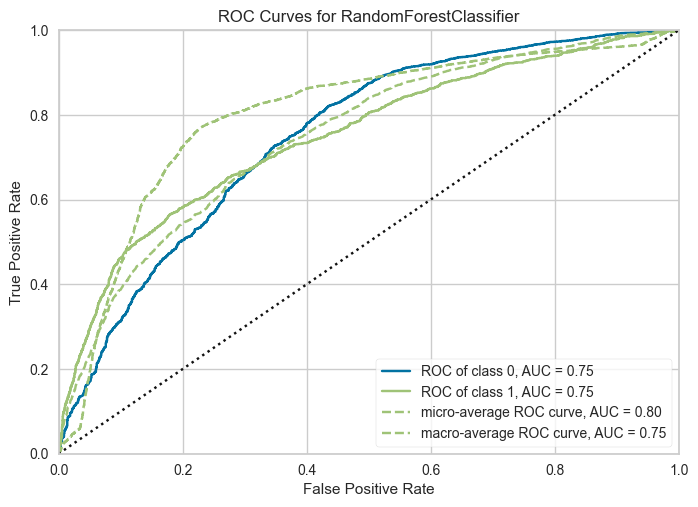

In [19]:
plot_model(tuned_rf, plot = 'auc')

### 10.2 Precision-Recall Plot

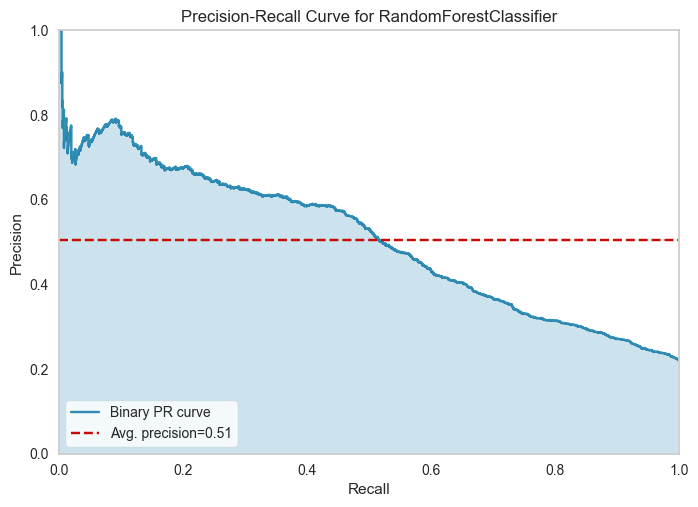

In [20]:
plot_model(tuned_rf, plot = 'pr')

### 10.3 Importância das variáveis (Feature Importance) Plot

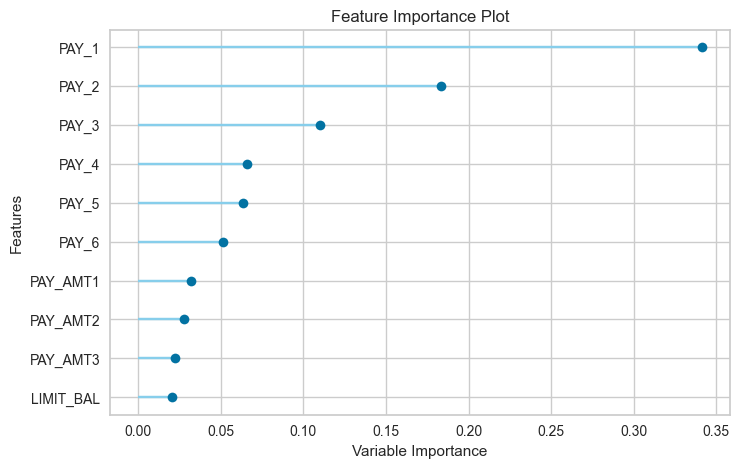

In [21]:
plot_model(tuned_rf, plot='feature')

### 10.4 Matriz de confusão (Confusion matrix)

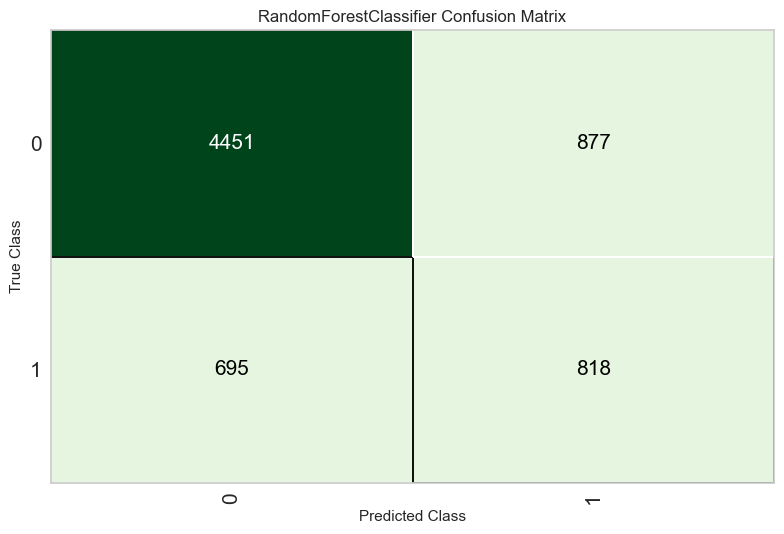

In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [23]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 11.0 Predict na amostra de test / hold-out

Antes de finalizar o modelo, é aconselhável realizar uma verificação final prevendo o conjunto de teste/hold-out e revisando as métricas de avaliação. Se você observar a grade de informações na Seção 6 acima, verá que 30% (6.841 amostras) dos dados foram separados como amostra de teste/resistência. Todas as métricas de avaliação que vimos acima são resultados de validação cruzada com base apenas no conjunto de treinamento (70%). Agora, usando nosso modelo final treinado armazenado na variável `tuned_rf`, faremos previsões em relação à amostra de retenção e avaliaremos as métricas para ver se elas são materialmente diferentes dos resultados do CV.

In [24]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7702,0.7498,0.5406,0.4826,0.5100,0.3605,0.3615


A precisão no conjunto de teste/hold-out é **`0.7835`** comparada a **`0.7824`** alcançada nos resultados do CV `tuned_rf` (na seção 9.3 acima). Esta não é uma diferença significativa. Se houver uma grande variação entre os resultados do teste/hold-out e do CV, isso normalmente indicaria um ajuste excessivo, mas também pode ser devido a vários outros fatores e exigiria investigação adicional. Nesse caso, avançaremos com a finalização do modelo e a previsão de dados não vistos (os 5% que separamos no início e nunca expusemos ao PyCaret).

(DICA: É sempre bom observar o desvio padrão dos resultados do CV ao usar `create_model()`.)

# 12.0 Finalizando o modelo para deploy

A finalização do modelo é a última etapa do experimento. Um fluxo de trabalho normal de aprendizado de máquina no PyCaret começa com `setup()`, seguido pela comparação de todos os modelos usando `compare_models()` e listando alguns modelos candidatos (com base na métrica de interesse) para executar várias técnicas de modelagem, como ajuste de hiperparâmetros, ensembling, empilhamento, etc. Esse fluxo de trabalho acabará por levá-lo ao melhor modelo para uso em fazer previsões sobre dados novos e não vistos. A função `finalize_model()` ajusta o modelo ao conjunto de dados completo, incluindo a amostra de teste/hold-out (30% neste caso). O objetivo dessa função é treinar o modelo no conjunto de dados completo antes de ser implantado na produção.

In [25]:
final_rf = finalize_model(tuned_rf)

In [26]:
#Parâmetros finais do modelo Random Forest para deploy
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                

**Cuidado:** mais uma coisa para prestar atenção. Depois que o modelo é finalizado usando `finalize_model()`, todo o conjunto de dados, incluindo o conjunto de teste/hold-out, é usado para treinamento. Como tal, se o modelo for usado para previsões no conjunto de retenção após o uso de `finalize_model()`, as informações impressas poderá confundir, pois você está predizendo nos mesmos dados que foram usados para modelagem (treino). Para demonstrar apenas este ponto, usaremos `final_rf` em `predict_model()` para comparar a tabela de informações com a acima na seção 11.

In [27]:
predict_model(final_rf);

Observe como o AUC em `final_rf` aumentou para **`0.7713`** de **`0.7694`**, mesmo que o modelo seja o mesmo. Isso ocorre porque a variável `final_rf` foi treinada no conjunto de dados completo, incluindo o conjunto de teste/hold-out.

# 13.0 Predizendo o conjunto de dados que não foi usado no treino

A função `predict_model()` também é usada para predizer no conjunto de dados não visto. A única diferença da seção 11 acima é que desta vez passaremos o parâmetro `data_unseen`. `data_unseen` é a variável criada no início do tutorial e contém 5% (1200 amostras) do conjunto de dados original que nunca foi exposto ao PyCaret. (veja a seção 5 para explicação)

In [28]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.5640
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.7276
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.5891
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.8832
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.5220


As colunas `Label` e `Score` são adicionadas ao conjunto `data_unseen`. Rótulo é a previsão e pontuação é a probabilidade da previsão. Observe que os resultados previstos são concatenados ao conjunto de dados original enquanto todas as transformações são executadas automaticamente em segundo plano. Você também pode verificar as métricas sobre isso, pois tem a coluna de destino real `default` disponível. Para fazer isso, usaremos o módulo `pycaret.utils`. Veja exemplo abaixo:

In [29]:
from pycaret.utils.generic import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['prediction_label'], metric = 'Accuracy')

0.7808

# 14.0 Salvando o modelo final

Agora terminamos o experimento finalizando o modelo `tuned_rf` que agora está armazenado na variável `final_rf`. Também usamos o modelo armazenado em `final_rf` para prever `data_unseen`. Isso nos leva ao final de nosso experimento, mas uma pergunta ainda deve ser feita: o que acontece quando você tem mais dados novos para predizer? Você tem que passar por todo o experimento novamente? A resposta é não, a função interna do PyCaret `save_model()` permite que você salve o modelo junto com todo o pipeline de transformação para uso posterior.

In [30]:
save_model(final_rf,'Final RF Model 01Jun2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
 

(DICA: É sempre bom usar data no nome do arquivo ao salvar modelos, é bom para controle de versão.)

# 15.0 Carregando o modelo salvo

Para carregar um modelo salvo em uma data futura no mesmo ambiente ou em um ambiente alternativo, usaríamos a função `load_model()` do PyCaret e, em seguida, aplicaríamos facilmente o modelo salvo em novos dados não vistos para previsão.

In [31]:
saved_final_rf = load_model('Final RF Model 01Jun2022')

Transformation Pipeline and Model Successfully Loaded


Uma vez que o modelo é carregado no ambiente, você pode simplesmente usá-lo para prever quaisquer novos dados usando a mesma função `predict_model()`. Abaixo, aplicamos o modelo carregado para prever o mesmo `data_unseen` que usamos na seção 13 acima.

In [32]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [33]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.5640
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.7276
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.5891
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.8832
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.5220


Observe que os resultados de `unseen_predictions` e `new_prediction` são idênticos.

In [34]:
from pycaret.utils.generic import check_metric
check_metric(new_prediction['default'], new_prediction['prediction_label'], metric = 'Accuracy')

0.7808

# 16.0 Resumo / Próximos passos?

Este tutorial cobriu todo o pipeline de aprendizado de máquina desde a ingestão de dados, pré-processamento, treinamento do modelo, ajuste de hiperparâmetros, previsão e salvamento do modelo para uso posterior. Concluímos todas essas etapas em menos de 10 comandos que são naturalmente construídos e muito intuitivos de lembrar, como `create_model()`, `tune_model()`, `compare_models()`. Recriar todo o experimento sem o PyCaret levaria mais de 100 linhas de código na maioria das bibliotecas.

Nós cobrimos apenas o básico de `pycaret.classification`. Nos tutoriais a seguir, aprofundaremos o pré-processamento avançado, o ensembling, o empilhamento generalizado e outras técnicas que permitem personalizar totalmente seu pipeline de aprendizado de máquina e devem ser conhecidas por qualquer cientista de dados.

Nos vemos no próximo tutorial. Siga o link para __[Tutorial de classificação binária (CLF102) - Nível intermediário - Inglês](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__